In [119]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [120]:
dataset_path ='C:/Users/Doaa/Desktop/machine learning/K_Mean dataset'

In [121]:
def load_and_preprocess_images(path):
    images = []
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path)
             # Convert to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if img is not None:
                img = cv2.resize(img, (100, 100))  
                images.append(img)
    return np.array(images)


In [122]:
def visualize_clusters_with_centers(reduced_data, labels, centers):
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('K-means Clustering Results with Cluster Centers')
    plt.legend()
    plt.show()
    



In [123]:
image_data = load_and_preprocess_images(dataset_path)

In [124]:
flattened_data = image_data.reshape(-1, 100 * 100 * 3)  

In [125]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flattened_data)


In [126]:
# Apply K-means clustering on reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(reduced_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

C:\Users\Doaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


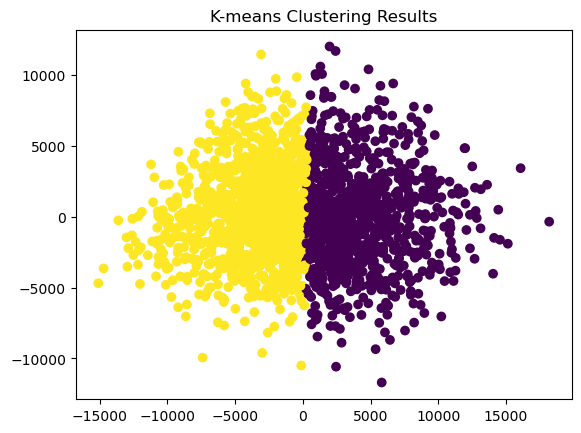

In [127]:
# Visualize the results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering Results')
plt.show()

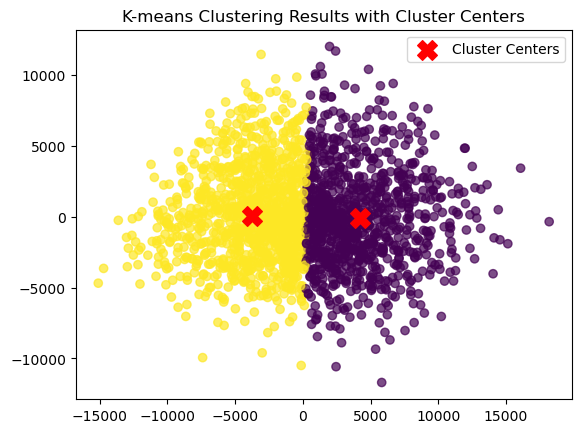

In [128]:
# Visualize the results with cluster centers
visualize_clusters_with_centers(reduced_data, labels, centers)

In [129]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(flattened_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10352243142312158


In [130]:
db_index = davies_bouldin_score(flattened_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 2.751897910513604
